# Derivation of Airfoil Coordinate Normal Functions

## Imports

In [49]:
import sympy as sym
import numpy as np
from sympy.vector import CoordSys3D
from sympy import lambdify
import matplotlib.pyplot as plt
%matplotlib inline

## Variables

In [7]:
x, a, b, c, d, e, t = sym.symbols('x a b c d e t')
N = CoordSys3D('N')

## Symmetric Airfoil Equation

In [8]:
airfoil = x*N.i + 5*t*(a*sym.sqrt(x) + b*x + c*sym.Pow(x, 2) + d*sym.Pow(x, 3) + e*sym.Pow(x, 4))*N.j
airfoil

x*N.i + (5*t*(a*sqrt(x) + b*x + c*x**2 + d*x**3 + e*x**4))*N.j

## Tangent Vector

In [12]:
tangent = sym.diff(airfoil, x)

In [13]:
tangent

N.i + (5*t*(a/(2*sqrt(x)) + b + 2*c*x + 3*d*x**2 + 4*e*x**3))*N.j

## Normal Vector

In [18]:
normal = -1*tangent.coeff(N.j)*N.i + tangent.coeff(N.i)*N.j

In [20]:
unit_normal = normal/normal.magnitude()

In [25]:
unit_normal

(-5*t*(a/(2*sqrt(x)) + b + 2*c*x + 3*d*x**2 + 4*e*x**3)/sqrt(25*t**2*(a/(2*sqrt(x)) + b + 2*c*x + 3*d*x**2 + 4*e*x**3)**2 + 1))*N.i + (1/sqrt(25*t**2*(a/(2*sqrt(x)) + b + 2*c*x + 3*d*x**2 + 4*e*x**3)**2 + 1))*N.j

## Plotting/Testing

In [30]:
coeffs = {
    'a':0.2969,
    'b':-0.1260,
    'c':-0.3516,
    'd':0.2843,
    'e':-0.1015,
    't':0.12
}
airfoil = airfoil.subs(coeffs)
unit_normal = unit_normal.subs(coeffs)

In [31]:
airfoil

x*N.i + (0.17814*sqrt(x) - 0.0609*x**4 + 0.17058*x**3 - 0.21096*x**2 - 0.0756*x)*N.j

In [52]:
fx_airfoil = lambdify(x, airfoil.coeff(N.i))
fy_airfoil = lambdify(x, airfoil.coeff(N.j))
fx_norm = lambdify(x, unit_normal.coeff(N.i))
fy_norm = lambdify(x, unit_normal.coeff(N.j))

[0.7767098  0.9204561  0.95753112 0.97407133 0.98319416 0.98881249
 0.9924991  0.99500875 0.99674962 0.99796252 0.99879917 0.9993603
 0.9997156  0.9999149  0.99999488 0.99998309 0.99990059 0.99976373
 0.99958534 0.99937553 0.99914233 0.99889208 0.99862985 0.9983596
 0.99808441 0.99780665 0.99752806 0.9972499  0.99697297 0.99669771
 0.99642425 0.99615243 0.99588186 0.99561195 0.99534192 0.99507079
 0.99479748 0.99452072 0.99423914 0.99395122 0.99365534 0.99334972
 0.99303248 0.99270161 0.99235497 0.99199026 0.99160504 0.99119672
 0.99076254 0.99029955]


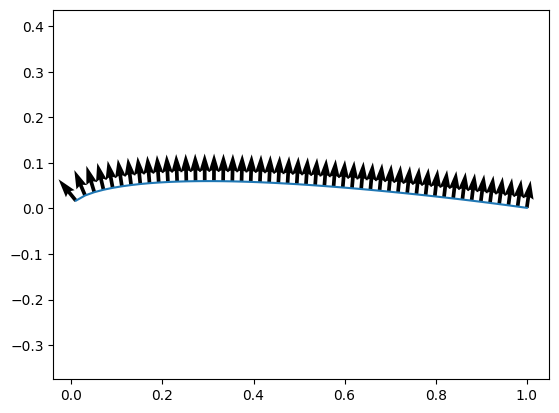

In [67]:
x_c = np.linspace(0.01, 1, 50)
y_c = fy_airfoil(x_c)
x_n = fx_norm(x_c)
y_n = fy_norm(x_c)
print(y_n)
plt.plot(x_c, y_c)
plt.quiver(x_c, y_c, x_n, y_n)
plt.axis('equal')
plt.show()